# Laboratorul 3

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

PI = np.pi

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

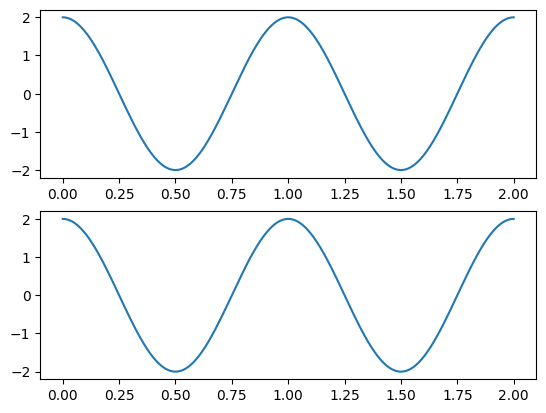

In [177]:
amp = 2
fr = 500
start = 0
stop = 2
faza = PI/2

t = np.linspace(start, stop, fr)

sin = amp * np.sin(2*PI*t*fr + faza)
cos = amp * np.cos(2*PI*t*fr + faza - PI/2) # cos (x - 90) = sin(x) ; 90 = PI/2

fig, axs = plt.subplots(2)
axs[0].plot(t, sin)
axs[1].plot(t, cos)

## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

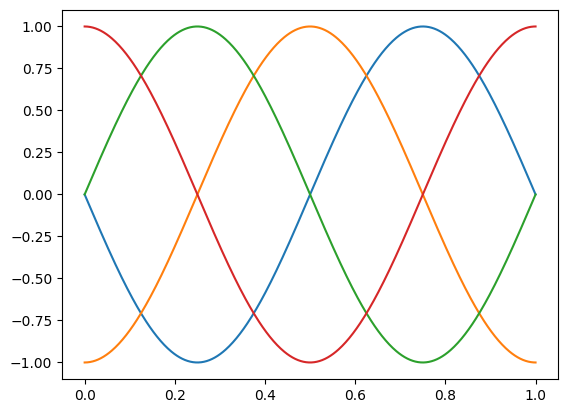

In [ ]:
amp = 1
fr = 500
start = 0
stop = 1

t = np.linspace(start, stop, fr)
# valorile de faza: PI/2, PI, 3*PI/4, 2*PI
faza = PI/2
for i in range(4):
    faza += PI/2
    sin = amp * np.sin(2*PI*t*fr + faza)
    plt.plot(t, sin)

plt.show()


## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

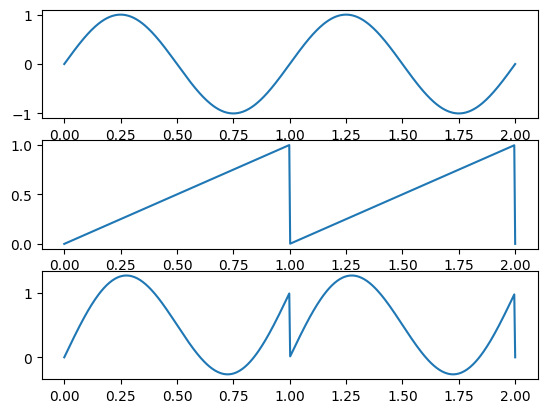

In [179]:
amp = 1
fr = 500
start = 0
stop = 2
faza = 0

t = np.linspace(start, stop, fr)

sin = amp * np.sin(2*PI*t*fr + faza)
saw = np.mod(t, 1)
sum = sin + saw

fig, axs = plt.subplots(3)
axs[0].plot(t, sin)
axs[1].plot(t, saw)
axs[2].plot(t, sum)

## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [180]:
amp = 1
fr1 = 1000
fr2 = 2000
rate = 44100
start = 0
stop = 3
faza = 0

t = np.linspace(start, stop, rate * stop)

sin1 = amp * np.sin(2*PI*t*fr1 + faza)
sin2 = amp * np.sin(2*PI*t*fr2 + faza)

signal = np.concatenate([sin1, sin2])

In [181]:
# audio save
scipy.io.wavfile.write('nume.wav', rate, signal)

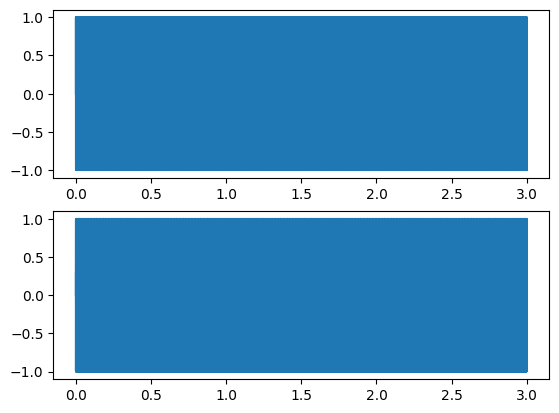

In [182]:
# audio play
rate, x = scipy.io.wavfile.read('nume.wav')
sounddevice.play(x, rate)
sounddevice.wait()

# ploturi
fig, axs = plt.subplots(2)
axs[0].plot(t, sin1)
axs[1].plot(t, sin2)

Observatii:
- semnalele cu fecvente mai mici se aud mai jos(mai gros), cu cat crestem frecventa cu atat se aude mai inalt(mai subtire)
- semnalele cu frecvente mari sunt mai neplacute
- teoretic ar trebui sa auzim pana la 20kHz, practic am imbatranit si nu mai auzim chiar la 20kHz


## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 500 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

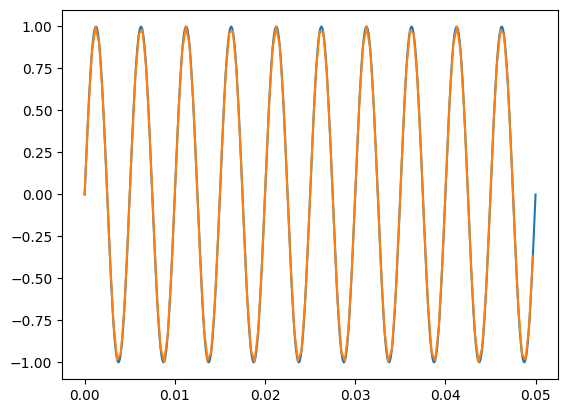

In [183]:
fr = 200
esantioane = 500
start = 0
stop = 0.05

t = np.linspace(start, stop, esantioane)
t_decimat = t[::4]

initial = np.sin(2*PI*fr*t)
decimat = initial[::4]

# fig, axs = plt.subplots(2)
# axs[0].plot(t, initial)
# axs[1].plot(t_decimat, decimat)
plt.plot(t, initial)
plt.plot(t_decimat, decimat)

2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

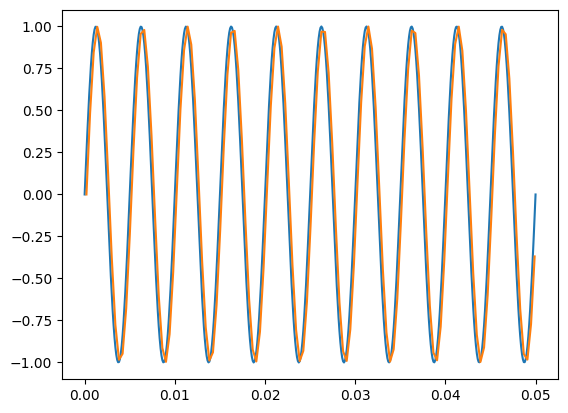

In [184]:
t_decimat2 = t[2::4]
decimat2 = initial[::4]

# fig, axs = plt.subplots(2)
# axs[0].plot(t, initial)
# axs[1].plot(t_decimat2, decimat2)
plt.plot(t, initial)
plt.plot(t_decimat2, decimat2)


Concluzii: 
- semnalele rezultate sunt diferite
- decimarea depinde de poziția de start
- decimarea nu este invariantă în timp

## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

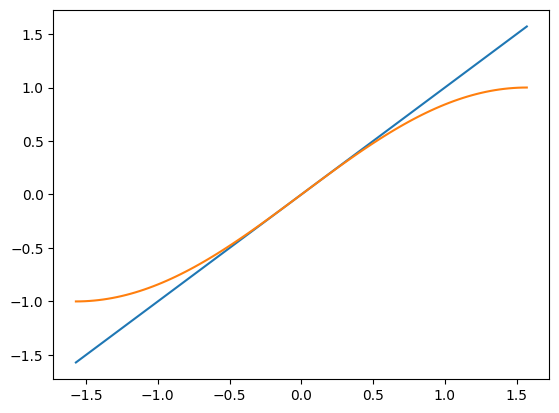

In [ ]:
start = -PI/2
stop = PI/2
fr = 100

t = np.linspace(start, stop, fr)
sin = np.sin(t)

plt.plot(t, t)
plt.plot(t, sin)
plt.show()

Mi se pare o aproximare suficient de buna, dar nu as folosi-o pentru valori mai mari de 0.5